In [1]:
pip install tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

In [ ]:
pip install pytorch

In [ ]:
pip install torch

In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
pip install tensorflow



In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [3]:
pip install jupyterthemes


     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB 435.7 kB/s eta 0:00:17
     - -------------------------------------- 0.2/7.0 MB 2.0 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/7.0 MB 3.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.0 MB 4.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.0 MB 4.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.2/7.0 MB 4.4 MB/s eta 0:00:02
     -------- ------------------------------- 1.4/7.0 MB 4.3 MB/s eta 0:00:02
     --------- ------------------------------ 1.6/7.0 MB 4.3 MB/s eta 0:00:02
     ---------- ----------------------------- 1.9/7.0 MB 4.4 MB/s eta 0:00:02
     ----------- ---------------------------- 2.1/7.0 MB 4.2 MB/s eta 0:00:02
     ------------ --------------------------- 2.2/7.0 MB 4.3 MB/s eta 0:00:02
     ------------- -------------------------- 2.3/7.0 MB 4.1 MB/s eta

In [6]:
os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [7]:
os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\train.csv', 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [8]:
# Check the number of images in the dataset
train = []
label = []


In [9]:
# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  for j in train_class:
    img = os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



In [10]:
train

['C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0024cdab0c1e.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\00cb6555d108.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0124dffecf29.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\01b3aed3ed4c.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0369f3efe69b.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\03e25101e8e8.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\04ac765f91a1.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\059bc89df7f4.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\05a5183c92d0.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0684311afdfc.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\06b71823f9cd.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\07929d32b5b3.png',
 'C:\\Users\\Len

In [11]:
label


['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

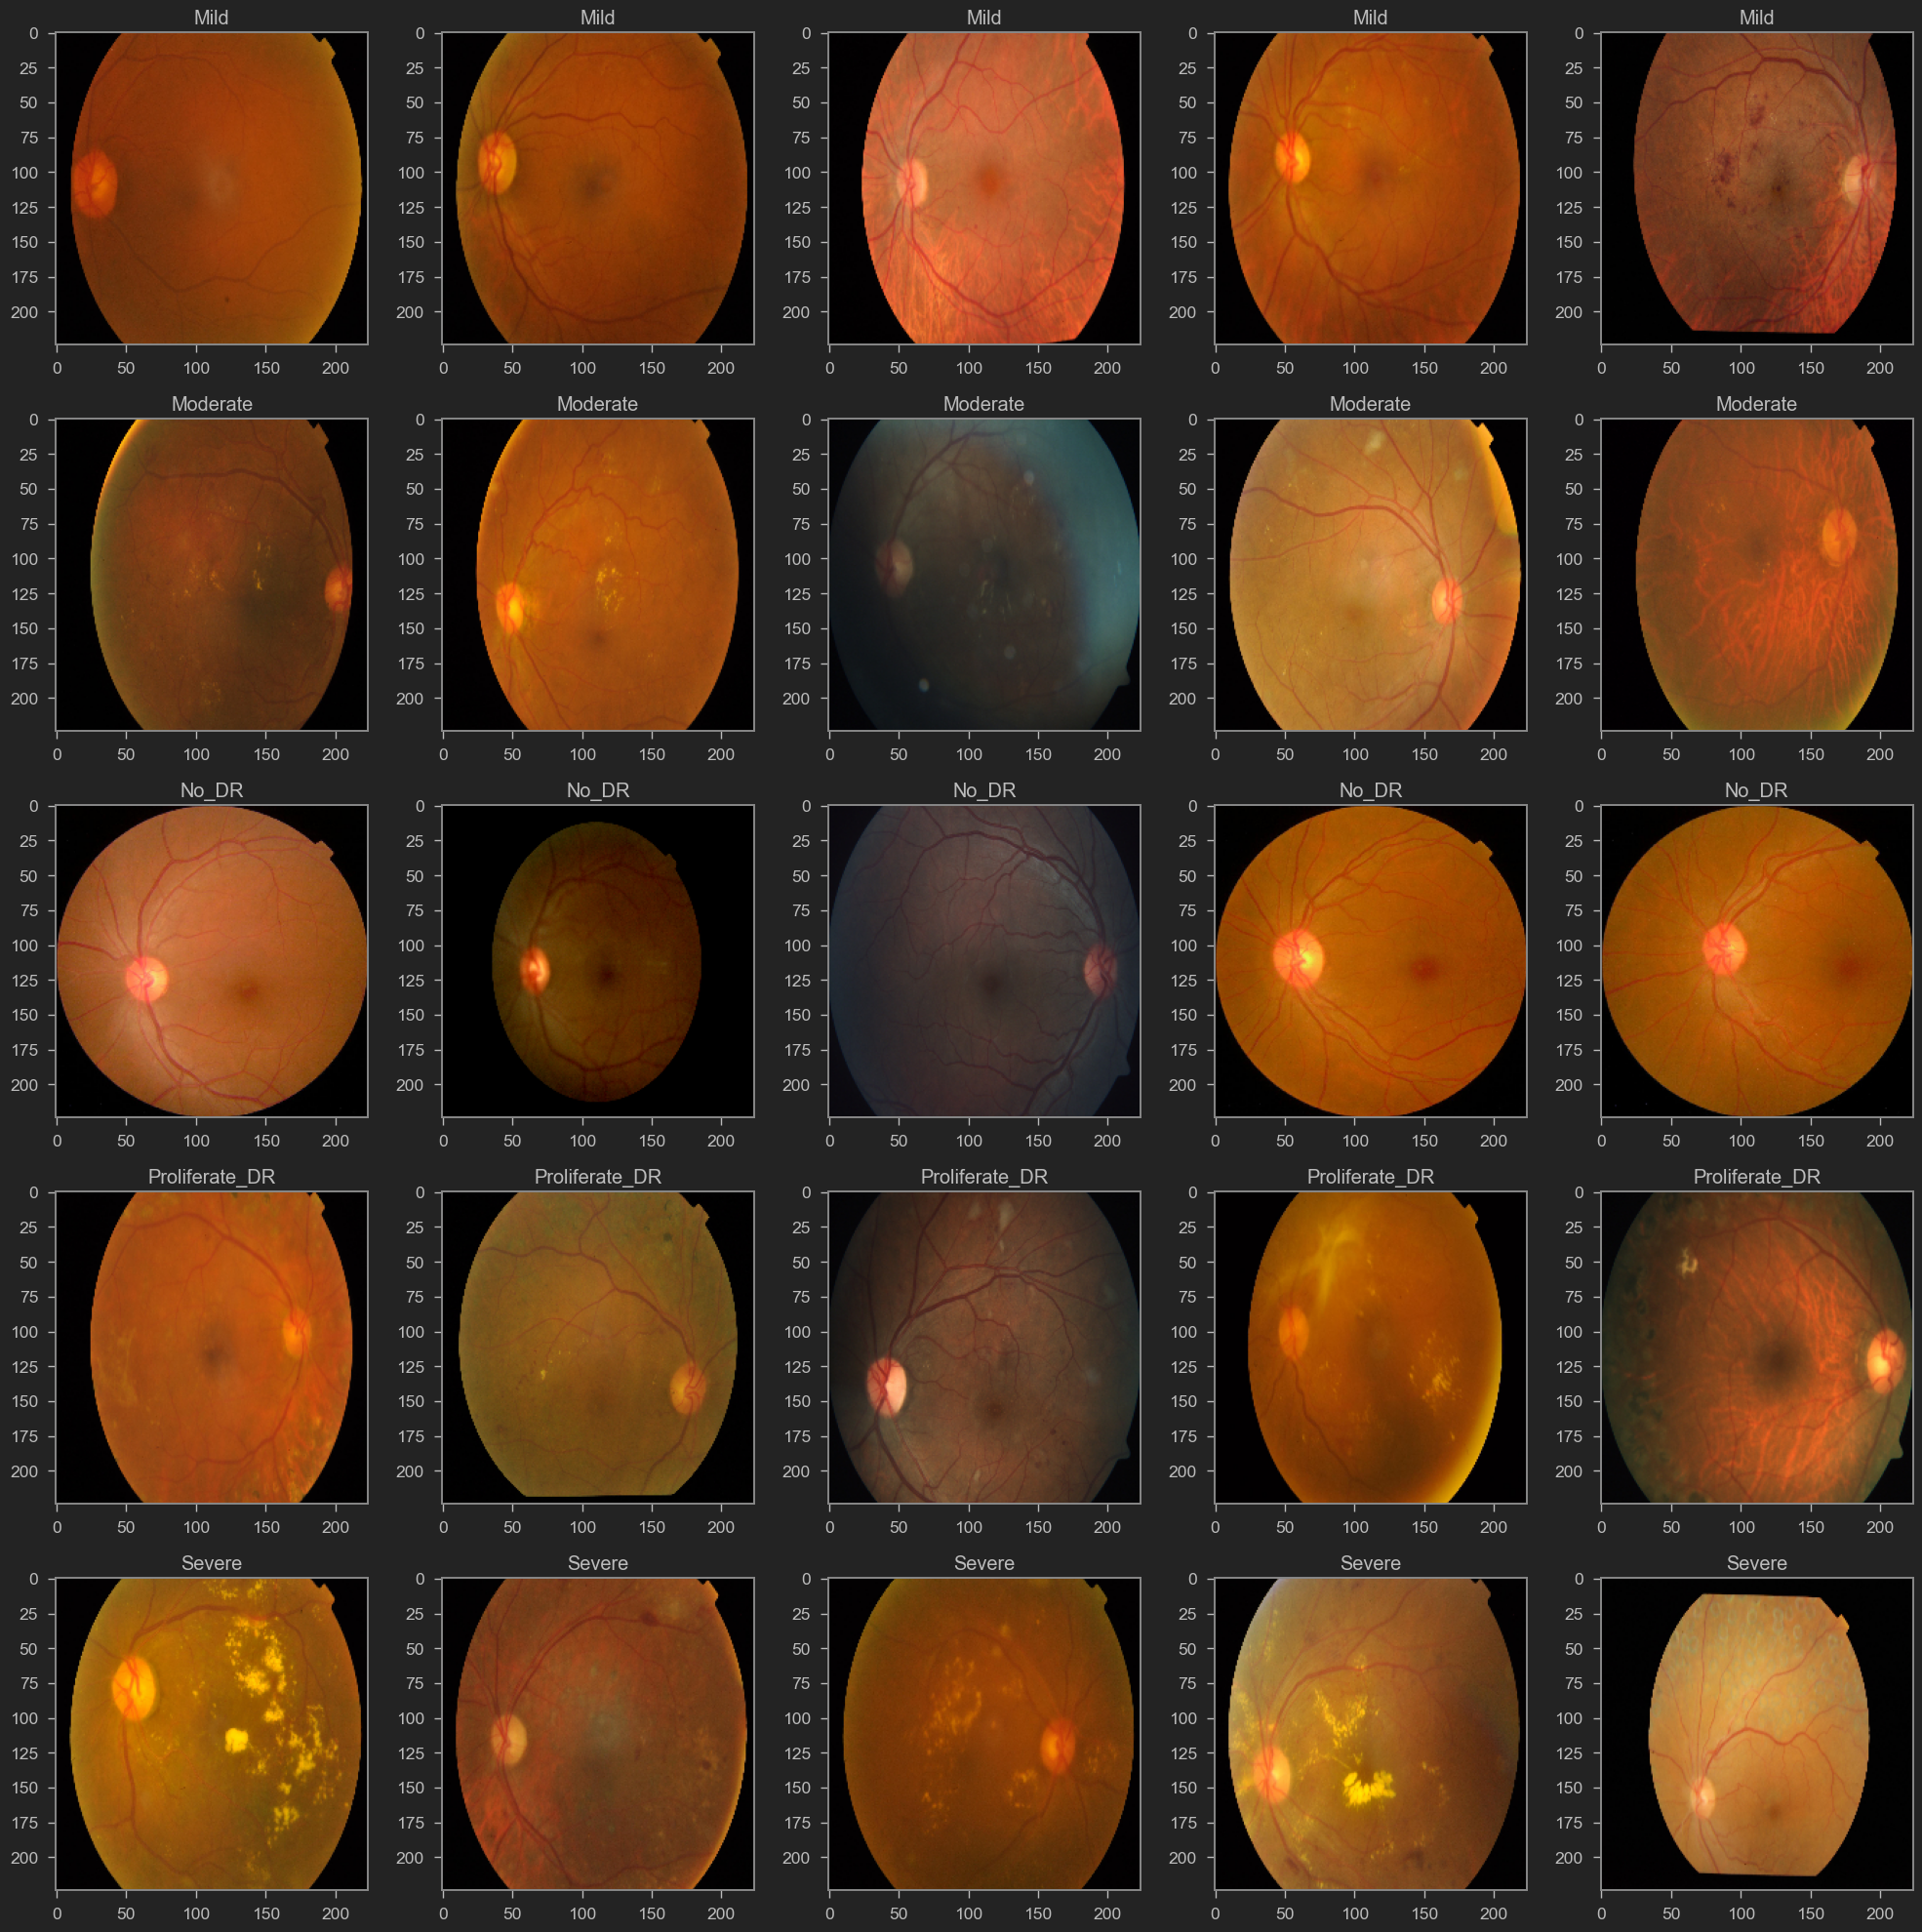

In [12]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

In [13]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [14]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image  Labels
0     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
1     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
2     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
3     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
4     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
...                                                 ...     ...
3657  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3658  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3659  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3660  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3661  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe

[3662 rows x 2 columns]

In [15]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [16]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)# Creating datagenerator for training, validation and test dataset.



In [17]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [18]:

def create_densenet_model(input_shape, num_classes):
    # Load pre-trained DenseNet121 model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
     # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
            # Global average pooling and dense output layer for classification
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(num_classes, activation='softmax')(x)
     # Create the final model
    model = Model(inputs=base_model.input, outputs=output, name='DenseNet121_Diabetic_Retinopathy')

    return model



In [19]:

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Adjust as per your requirements
num_classes = 5  # Assuming 5 classes for diabetic retinopathy severity level

In [20]:

# Create the DenseNet model for diabetic retinopathy detection
densenet_model = create_densenet_model(input_shape, num_classes)


29084464/29084464 [==============================] - 6s 0us/step


In [21]:

# Print model summary
densenet_model.summary()

Model: "DenseNet121_Diabetic_Retinopathy"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256      

In [22]:
densenet_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [23]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation lossmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [24]:
history = densenet_model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/10
77/77 [==============================] - ETA: 0s - loss: 1.1793 - accuracy: 0.5980
Epoch 1: val_loss improved from inf to 0.88386, saving model to weights.hdf5


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 426s 5s/step - loss: 1.1793 - accuracy: 0.5980 - val_loss: 0.8839 - val_accuracy: 0.7188
Epoch 2/10
77/77 [==============================] - ETA: 0s - loss: 0.8346 - accuracy: 0.7107
Epoch 2: val_loss improved from 0.88386 to 0.77248, saving model to weights.hdf5
77/77 [==============================] - 400s 5s/step - loss: 0.8346 - accuracy: 0.7107 - val_loss: 0.7725 - val_accuracy: 0.7212
Epoch 3/10
77/77 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.7413
Epoch 3: val_loss improved from 0.77248 to 0.69030, saving model to weights.hdf5
77/77 [==============================] - 392s 5s/step - loss: 0.7443 - accuracy: 0.7413 - val_loss: 0.6903 - val_accuracy: 0.7668
Epoch 4/10
77/77 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7522
Epoch 4: val_loss did not improve from 0.69030
77/77 [==============================] - 270s 4s/step - loss: 0.6900 - accuracy: 0.7522 - val_loss: 0.7356 - val_accura

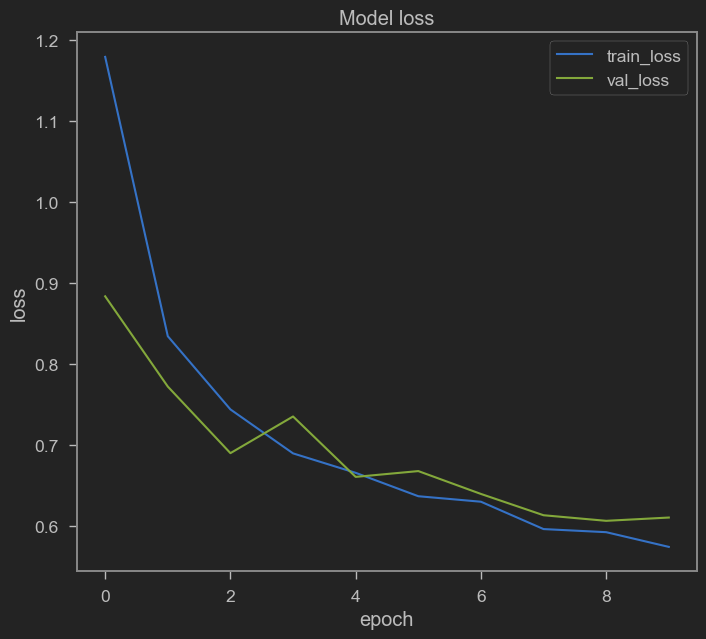

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()